# Kmeans Clustering as a feature discovery technique
### Cluster lable를 구하면 기존 변수와 상관관계가 높아지게 되어 예측성능이 저하, So
### Cluset transform(거리)를 구해 (만약 cluster가 n개이면, 기존변수는 모두 버리고 n개의 변수(거리)로 예측)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## SVM으로 예측 분류
https://towardsdatascience.com/k-means-tricks-for-fun-and-profit-724996864274

In [2]:
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

X, y = load_breast_cancer(return_X_y=True)
np.unique(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
svm = LinearSVC(random_state=17)
svm.fit(X_train, y_train)
svm.score(X_test, y_test) # should be ~0.93

array([0, 1])

LinearSVC(random_state=17)

0.9300699300699301

In [3]:
np.unique(y)
pd.DataFrame(X_train).head()

array([0, 1])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,8.219,20.70,53.27,203.9,0.09405,0.13050,0.132100,0.021680,0.2222,0.08261,...,9.092,29.72,58.08,249.8,0.1630,0.43100,0.538100,0.07879,0.3322,0.14860
1,13.960,17.05,91.43,602.4,0.10960,0.12790,0.097890,0.052460,0.1908,0.06130,...,16.390,22.07,108.10,826.0,0.1512,0.32620,0.320900,0.13740,0.3068,0.07957
2,15.500,21.08,102.90,803.1,0.11200,0.15710,0.152200,0.084810,0.2085,0.06864,...,23.170,27.65,157.10,1748.0,0.1517,0.40020,0.421100,0.21340,0.3003,0.10480
3,11.330,14.16,71.79,396.6,0.09379,0.03872,0.001487,0.003333,0.1954,0.05821,...,12.200,18.99,77.37,458.0,0.1259,0.07348,0.004955,0.01111,0.2758,0.06386
4,12.180,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.017700,0.1739,0.05677,...,13.340,32.84,84.58,547.8,0.1123,0.08862,0.114500,0.07431,0.2694,0.06878


## SVM classification with new feature of clustering 
### 1. Cluster label을 feature로 구성한 훈련/검증데이터

In [4]:
svm = LinearSVC(random_state=17)
kmeans = KMeans(n_clusters=3, random_state=17)

### 훈련데이터 with clustering label

In [5]:
X_clusters_train = kmeans.fit_predict(X_train).reshape(-1, 1)

# cluster의 개수와 데이터 구성
np.unique(X_clusters_train)
data_train = pd.DataFrame(np.hstack([X_train, X_clusters_train]))
data_train.head()
data_train[30].value_counts(normalize=True)

array([0, 1, 2])

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,8.219,20.70,53.27,203.9,0.09405,0.13050,0.132100,0.021680,0.2222,0.08261,...,29.72,58.08,249.8,0.1630,0.43100,0.538100,0.07879,0.3322,0.14860,0.0
1,13.960,17.05,91.43,602.4,0.10960,0.12790,0.097890,0.052460,0.1908,0.06130,...,22.07,108.10,826.0,0.1512,0.32620,0.320900,0.13740,0.3068,0.07957,0.0
2,15.500,21.08,102.90,803.1,0.11200,0.15710,0.152200,0.084810,0.2085,0.06864,...,27.65,157.10,1748.0,0.1517,0.40020,0.421100,0.21340,0.3003,0.10480,2.0
3,11.330,14.16,71.79,396.6,0.09379,0.03872,0.001487,0.003333,0.1954,0.05821,...,18.99,77.37,458.0,0.1259,0.07348,0.004955,0.01111,0.2758,0.06386,0.0
4,12.180,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.017700,0.1739,0.05677,...,32.84,84.58,547.8,0.1123,0.08862,0.114500,0.07431,0.2694,0.06878,0.0


0.0    0.744131
2.0    0.215962
1.0    0.039906
Name: 30, dtype: float64

### 검증데이터 with clustering label

In [6]:
X_clusters_test = kmeans.fit_predict(X_test).reshape(-1, 1)
np.unique(X_clusters_test)
data_test = pd.DataFrame(np.hstack([X_test, X_clusters_test]))
data_test.head()
data_test[30].value_counts(normalize=True)

array([0, 1, 2])

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,12.56,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,0.1533,0.06184,...,22.43,89.02,547.4,0.1096,0.2002,0.23880,0.09265,0.2121,0.07188,0.0
1,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881,0.0
2,11.81,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,0.1718,0.05780,...,26.48,79.57,489.5,0.1356,0.1000,0.08803,0.04306,0.3200,0.06576,0.0
3,13.87,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.02088,0.1424,0.05883,...,25.58,96.74,694.4,0.1153,0.1008,0.05285,0.05556,0.2362,0.07113,0.0
4,11.08,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.02583,0.1566,0.06669,...,16.82,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313,0.0


0.0    0.699301
2.0    0.174825
1.0    0.125874
Name: 30, dtype: float64

In [7]:
svm.fit(data_train, y_train)
svm.score(data_test, y_test) # should be ~0.937

LinearSVC(random_state=17)

0.9370629370629371

### 검증데이터 with clustering distances

In [8]:
# imports from the example above
svm = LinearSVC(random_state=17)
kmeans = KMeans(n_clusters=3, random_state=17)
X_clusters = kmeans.fit_transform(X_train)
pd.DataFrame(X_clusters).head()

svm.fit(np.hstack([X_train, X_clusters]), y_train)
svm.score(np.hstack([X_test, kmeans.transform(X_test)]), y_test)
# should be ~0.727
# kmeans.transform(X_test)

,0,1,2
0,460.810456,2856.187554,1492.436826
1,246.126672,2155.525148,788.934356
2,1193.675364,1275.165189,360.824967
3,177.948433,2578.850344,1211.961091
4,69.661908,2470.238122,1102.790002


LinearSVC(random_state=17)

0.7272727272727273

### <font color ='red'> 클러스터의 거리를 파생변수로 추출하여 예측하면 성능이 떨어지나? 거리와 원래 변수간 상관관계가 높기 떄문(PCA)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 
           'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 
           'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 
           'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 
           'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 
           'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 
           'worst symmetry', 'worst fractal dimension', 'distance to cluster 1', 'distance to cluster 2', 'distance to cluster 3']
data = pd.DataFrame.from_records(np.hstack([X_train, X_clusters]), columns=columns)
data = pd.DataFrame(np.hstack([X_train, X_clusters]), columns=columns)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,distance to cluster 1,distance to cluster 2,distance to cluster 3
0,8.219,20.70,53.27,203.9,0.09405,0.13050,0.132100,0.021680,0.2222,0.08261,...,249.8,0.1630,0.43100,0.538100,0.07879,0.3322,0.14860,460.810456,2856.187554,1492.436826
1,13.960,17.05,91.43,602.4,0.10960,0.12790,0.097890,0.052460,0.1908,0.06130,...,826.0,0.1512,0.32620,0.320900,0.13740,0.3068,0.07957,246.126672,2155.525148,788.934356
2,15.500,21.08,102.90,803.1,0.11200,0.15710,0.152200,0.084810,0.2085,0.06864,...,1748.0,0.1517,0.40020,0.421100,0.21340,0.3003,0.10480,1193.675364,1275.165189,360.824967
3,11.330,14.16,71.79,396.6,0.09379,0.03872,0.001487,0.003333,0.1954,0.05821,...,458.0,0.1259,0.07348,0.004955,0.01111,0.2758,0.06386,177.948433,2578.850344,1211.961091
4,12.180,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.017700,0.1739,0.05677,...,547.8,0.1123,0.08862,0.114500,0.07431,0.2694,0.06878,69.661908,2470.238122,1102.790002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,11.540,10.72,73.73,409.1,0.08597,0.05969,0.013670,0.008907,0.1833,0.06100,...,467.8,0.1092,0.16260,0.083240,0.04715,0.3390,0.07434,163.786752,2564.595523,1197.315783
422,16.140,14.86,104.30,800.0,0.09495,0.08501,0.055000,0.045280,0.1735,0.05875,...,947.9,0.1206,0.17220,0.231000,0.11290,0.2778,0.07012,461.348649,1957.557337,588.944731
423,10.260,12.22,65.75,321.6,0.09996,0.07542,0.019230,0.019680,0.1800,0.06569,...,394.5,0.1343,0.16500,0.086150,0.06696,0.2937,0.07722,273.503420,2671.432833,1306.126128
424,12.900,15.92,83.74,512.2,0.08677,0.09509,0.048940,0.030880,0.1778,0.06235,...,643.8,0.1312,0.25480,0.209000,0.10120,0.3549,0.08118,43.142430,2359.892913,992.376748


In [10]:
#data.corr().style.background_gradient(axis=0)

<AxesSubplot:>

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5]),
 [Text(0.5, 0, 'mean radius'),
  Text(2.5, 0, 'mean perimeter'),
  Text(4.5, 0, 'mean smoothness'),
  Text(6.5, 0, 'mean concavity'),
  Text(8.5, 0, 'mean symmetry'),
  Text(10.5, 0, 'radius error'),
  Text(12.5, 0, 'perimeter error'),
  Text(14.5, 0, 'smoothness error'),
  Text(16.5, 0, 'concavity error'),
  Text(18.5, 0, 'symmetry error'),
  Text(20.5, 0, 'worst radius'),
  Text(22.5, 0, 'worst perimeter'),
  Text(24.5, 0, 'worst smoothness'),
  Text(26.5, 0, 'worst concavity'),
  Text(28.5, 0, 'worst symmetry'),
  Text(30.5, 0, 'distance to cluster 1'),
  Text(32.5, 0, 'distance to cluster 3')])

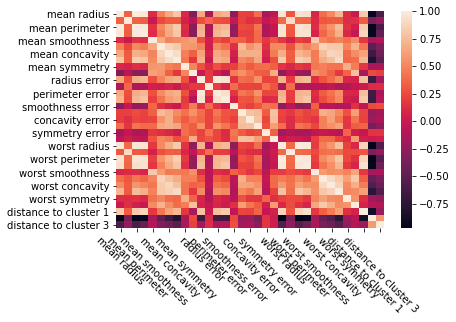

In [11]:
sns.heatmap(data.corr())
plt.xticks(rotation=-45)
plt.show()

## 2. 원래 변수는 모두 제거하고 클러스터링 거리, 파생변수만 가지고 예측

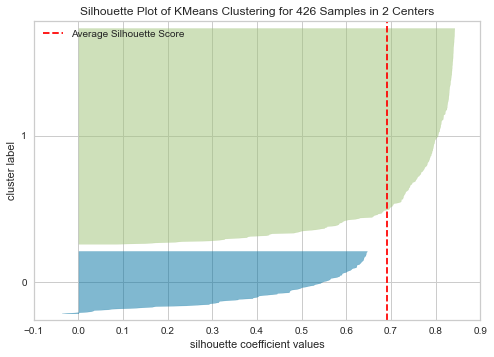

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=16))

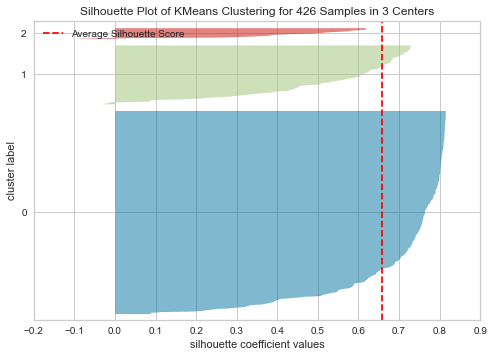

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=16))

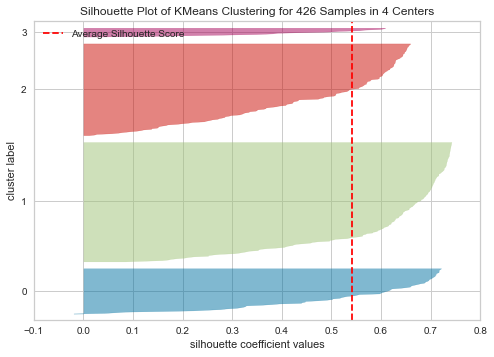

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=16))

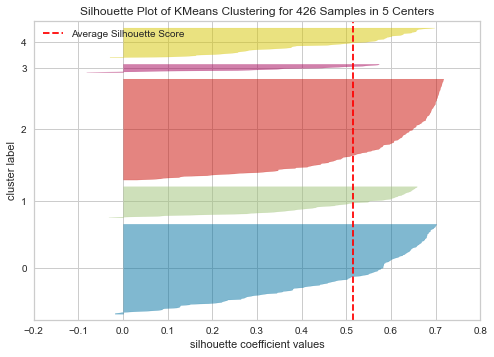

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=5, random_state=16))

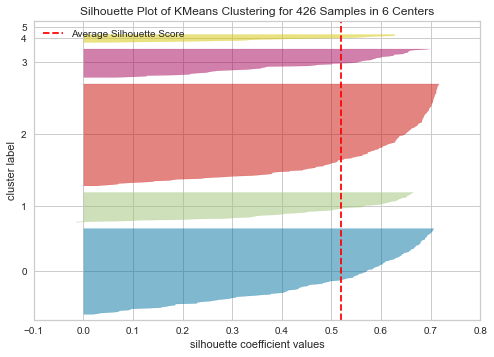

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=6, random_state=16))

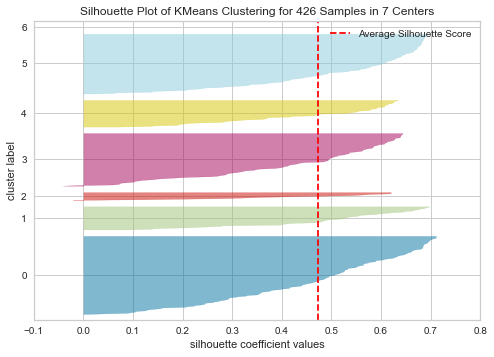

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=7, random_state=16))

In [12]:
from yellowbrick.cluster import silhouette_visualizer
# Use the quick method and immediately show the figure
for i in range(2,8):
    silhouette_visualizer(KMeans(n_clusters=i, random_state=16),
                      X_train, 
                      colors='yellowbrick')

In [13]:
# imports from the example above
svm = LinearSVC(random_state=17)
kmeans = KMeans(n_clusters=3, random_state=17)
X_clusters = kmeans.fit_transform(X_train)
pd.DataFrame(X_clusters).head()
svm.fit(X_clusters, y_train)
svm.score(kmeans.transform(X_test), y_test) # should be ~0.951

,0,1,2
0,460.810456,2856.187554,1492.436826
1,246.126672,2155.525148,788.934356
2,1193.675364,1275.165189,360.824967
3,177.948433,2578.850344,1211.961091
4,69.661908,2470.238122,1102.790002


LinearSVC(random_state=17)

0.951048951048951

# End